<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ENEE439d-TEXTML/TextML/blob/master/input.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ENEE439d-TEXTML/TextML/blob/master/input.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Imports

In [2]:
!pip install -q -U "tensorflow-text==2.8.*" # A dependency of the preprocessing for BERT inputs
!pip install -q tf-models-official==2.7.0 # For adamW
!pip install focal-loss # focal loss implmnetion for tf

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.9 MB 6.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 462 kB 60.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.8 MB 11.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 41.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 99 kB 8.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 54.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47.8 MB 1.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 237 kB 57.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [3]:
import pandas as pd #basic imports
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras import layers
import re

In [4]:
from sklearn.model_selection import train_test_split # https://www.tensorflow.org/text/tutorials/classify_text_with_bert
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization, bert  # to create AdamW optimizer
from focal_loss import SparseCategoricalFocalLoss
import official.nlp.bert.tokenization

# Data read in

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filepath = '/content/drive/MyDrive/Text-ML/full_sentiment_dataset.csv' #'data.csv'
df= pd.read_csv(filepath)
df1=df.drop(['no','paper','context_a','context_b'],axis=1)
df1.head()

cited_paper  label                                               text
0    A00-2024      0  We analyzed a set of articles and identified s...
1    A00-2024      0  Table 3: Example compressions Compression AvgL...
2    A00-2024      0  5.3 Related works and discussion Our two-step ...
3    A00-2024      0  (1999) proposed a summarization system based o...
4    A00-2024      0  We found that the deletion of lead parts did n...

In [7]:
df1['label'].value_counts()

 0    7627
 1     829
-1     280
Name: label, dtype: int64

# Filtering by regex

In [8]:
context=df1['text']

re1= "\(((([A-Za-z]+ *)+(, \d+))+(; )*)+\)" # matches author and author, year
re_year=",? \(?\d{4}\)?" # match , {4 digits} which may be wrapped in () 
re_and="(and|&) "
re_auth="((\w+, )*(\w+ )+)"
re_et= re_auth+"et al\. ?"+re_year # matches author et al. , year
re_2a= re_auth+"("+re_and+"((\w+ *))?)?"+re_year # matches author and author, year
re_sep="((; )|( "+re_and+"))*"# match the '; ' gap or ' and ' gap
re_para_year="\(\d{4}\)"
re_in_brack="\[*\]"
re_apa =re_in_brack+"|"+re_para_year+"|"+"\(?("+"(\(?"+re_2a+"|"+re_et+"\)?)"+re_sep+")+"
print(re_apa)

\[*\]|\(\d{4}\)|\(?((\(?((\w+, )*(\w+ )+)((and|&) ((\w+ *))?)?,? \(?\d{4}\)?|((\w+, )*(\w+ )+)et al\. ?,? \(?\d{4}\)?\)?)((; )|( (and|&) ))*)+


In [9]:
def remove_matches(text,regex=re_apa):
  text1=text
  rem_len=0
  pattern= re.compile(regex)
  while True:
    matches=pattern.search(text1)
    #print(matches)
    if matches == None:
      break

    spn=matches.span()
    text1=text1[0:spn[0]]+text1[spn[1]:-1]
    cit_len=spn[1]-spn[0]
    rem_len+=cit_len
  
  if len(text) >0:
    percent_removed=rem_len/len(text)
  else:
    percent_removed=1
  return text1,percent_removed 

# print(context[5])
# remove_citation(context[5],regex=re_apa)

In [10]:
output=df1['text'].apply(lambda x: remove_matches(text=x,regex=re_apa)) #df['col1'] = df.apply(lambda x: complex_function(x['col1']), axis=1)
df_o = pd.DataFrame(list(output), columns =['clean','p_rem'])
output_1=df_o['clean'].apply(lambda x: remove_matches(text=x,regex='[^\w_0-9 ]+')) 
df_o_1 = pd.DataFrame(list(output_1), columns =['clean','p_rem'])
#df_o.head()

df1['text_clean']=df_o_1['clean']
df1['text_clean_len']=df_o_1['clean'].apply(len)
df1['p_rem']=df_o['p_rem']

In [11]:
df1

cited_paper  label                                               text  \
0       A00-2024      0  We analyzed a set of articles and identified s...   
1       A00-2024      0  Table 3: Example compressions Compression AvgL...   
2       A00-2024      0  5.3 Related works and discussion Our two-step ...   
3       A00-2024      0  (1999) proposed a summarization system based o...   
4       A00-2024      0  We found that the deletion of lead parts did n...   
...          ...    ...                                                ...   
8731    W96-0213      1  He has achieved state-of-the art results by ap...   
8732    W96-0213      0  B = (Brill and Wu, 1998); M = (Magerman, 1995)...   
8733    W96-0213      0  The model we use is similar to that of (Ratnap...   
8734    W96-0213      1  Our model exploits the same kind of tag-n-gram...   
8735    W96-0213      0  In that table, TBL stands for Brill's transfor...   

                                             text_clean  text_clean_len  \
0     We analyzed a set of articles and identified s...             425   
1     Table 3 Example compressions Compression AvgLe...             229   
2     53 Related works and discussion Our twostep mo...             105   
3      proposed a summarization system based on the ...             321   
4     We found that the deletion of lead parts did n...              73   
...                                                 ...             ...   
8731  He has achieved stateofthe art results by appl...             139   
8732   B  M  Magerman 1995 O  our data R  Ratnaparkhi 1              48   
8733  The model we use is similar to that of Ratnapa...              55   
8734  Our model exploits the same kind of tagngram i...             157   
8735  In that table TBL stands for Brills transforma...             288   

         p_rem  
0     0.098765  
1     0.260745  
2     0.308176  
3     0.078804  
4     0.408000  
...        ...  
8731  0.151515  
8732  0.421488  
8733  0.000000  
8734  0.000000  
8735  0.000000  

[8736 rows x 6 columns]

# Remove under and over sized samples
large samples appear to be poorly written

In [12]:
def getMidLen(data,label,labelKey='label',lenKey='text_clean_len',lowMod=1,highMod=1):
  df1 =data.loc[data[labelKey] == label]
  neu_mean=np.mean(list(df1[lenKey]))
  neu_std=np.std(list(df1[lenKey]))
  df1_no_high = df1.loc[df1[lenKey] < highMod*(neu_mean +neu_std)]
  # print(neu_mean)
  # print(neu_std)

  while neu_std > neu_mean:
    neu_mean=np.mean(list(df1_no_high['text_clean_len']))
    neu_std=np.std(list(df1_no_high['text_clean_len']))
    # print(neu_mean)
    # print(neu_std)
    df1_no_high = df1.loc[df1['text_clean_len'] < highMod*(neu_mean +neu_std)]

  df1_mid = df1_no_high.loc[df1_no_high['text_clean_len'] > lowMod*(neu_mean -neu_std)]

  return df1_mid

df2 = df1.loc[df1['p_rem'] < .5] #keep sampels with less than half of it are citation

df_neu=getMidLen(df2,0,lowMod=2)
df_pos=getMidLen(df2,1,lowMod=1,highMod=2)
df_neg=getMidLen(df2,-1,lowMod=1,highMod=2)
df3= pd.concat([df_neg,df_neu,df_pos])
df3['label'].value_counts()

 0    2524
 1     746
-1     246
Name: label, dtype: int64

In [13]:
def catagorize(data,labelKey='label'):
  rows=len(data.index)
  onehots=np.zeros((rows,3),dtype=int)
  for i,lab in enumerate(data[labelKey]):
    onehots[i][lab+1]=1
  return onehots

hots=catagorize(df3)
df3['label_onehot']=list(hots)
df3['label_index']=df3['label']+1

In [14]:
freq= np.array(list(df3['label_index'].value_counts(normalize=True,sort=False)))
print(freq)
class_ratio= 1/freq
class_ratio

[0.06996587 0.71786121 0.21217292]


array([14.29268293,  1.39302694,  4.71313673])

#Load Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(list(df3['text_clean']), list(df3['label_index']), test_size=0.2, random_state=42)
X_train= [[s] for s in X_train]
X_test= [[s] for s in X_test]
y_train=[[s] for s in list(y_train)]
y_test=[[s] for s in list(y_test)]

In [16]:
#@title Choose a BERT model to fine-tune (Taken from tutorial)

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## check model passes

In [17]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [18]:
text_test = X_train[1]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101  1999  5688 11416  6024  4275  2024  4738  2000 25845  1996  4101]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [20]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.99835694 -0.7678578  -0.21300124  0.08411987 -0.08593949  0.98550844
  0.9732349  -0.8306031  -0.55687106 -0.95725054 -0.3960305  -0.94115573]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 3.8915187e-01  2.3267061e-01  6.1780311e-02 ... -9.2866874e-01
   4.3027106e-01  8.3279318e-01]
 [ 4.5310837e-01  7.2308904e-01 -3.2866317e-01 ... -1.1163950e-04
  -3.3482751e-01  5.7274055e-01]
 [-2.5876865e-01  1.4199525e+00 -4.2525381e-01 ...  4.9038833e-01
   1.4491324e-01  5.7048750e-01]
 ...
 [ 2.6529512e-01 -2.3668993e-01  8.4921330e-02 ...  2.0211086e-02
   3.9103544e-01  8.9449620e-01]
 [ 2.9499257e-01  5.8424294e-01 -6.7344594e-01 ... -1.6148384e+00
   1.3211843e+00 -6.0517174e-01]
 [-1.8697177e-01  5.2527428e-01  9.2377967e-01 ... -5.6088662e-01
   1.0293359e+00 -7.8856331e-01]]


## full model setup

In [21]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [22]:
classifier_model = build_classifier_model()

## check loss function

In [23]:
bert_raw_result = classifier_model(tf.constant(text_test))
print(bert_raw_result)

l =  SparseCategoricalFocalLoss(gamma=2,class_weight=class_ratio)
test =tf.convert_to_tensor([1.0])
l(test,bert_raw_result)

tf.Tensor([[0.07656216 0.749452   0.1739859 ]], shape=(1, 3), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.02522065>

# Train Save and Log

In [24]:
epochs = 5
steps_per_epoch = 200 #tf.data.experimental.cardinality(X_train).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

# def auc_wrapper(y_true,y_pred):
#   print(y_true,y_pred)

#   y_true=tf.reshape(y_true,[1])
#   print(y_true)
#   y_true= tf.cast(y_true, tf.int32)
#   print(y_true)
#   y_true=tf.one_hot(y_true,depth=3)
#   print(y_true)
#   return tf.keras.metrics.AUC(multi_label=True)(y_true,y_pred)


loss =  SparseCategoricalFocalLoss(gamma=2,class_weight=class_ratio) #tf.keras.losses.MeanSquaredError()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]#, auc_wrapper]#, tf.keras.metrics.AUC(multi_label=True)]


classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="citation_BERT_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_sparse_categorical_accuracy",
        verbose=1
    ),
    tf.keras.callbacks.TensorBoard('./logs', update_freq=1)
]


In [25]:
# print(f'Training model with {tfhub_handle_encoder}')
# history = classifier_model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),epochs=epochs,callbacks= callbacks, verbose=True)

In [26]:
# classifier_model.save_weights(''/content/drive/MyDrive/Text-ML/checkpoint1')

## Inspect model

In [27]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [28]:
#%tensorboard --logdir=logs

In [30]:
classifier_model.load_weights('/content/drive/MyDrive/Text-ML/checkpoint')

In [182]:
preds=classifier_model.predict(X_train,verbose=1)

88/88 [==============================] - 197s 2s/step


In [184]:
preds_t=classifier_model.predict(X_test,verbose=1)

22/22 [==============================] - 49s 2s/step


In [192]:
import seaborn as sns; sns.set_theme()

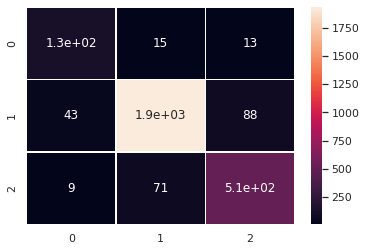

In [200]:
c_mat=tf.math.confusion_matrix(np.argmax(preds,-1),y_train)
ax = sns.heatmap(c_mat,annot=True,linewidths=.5)

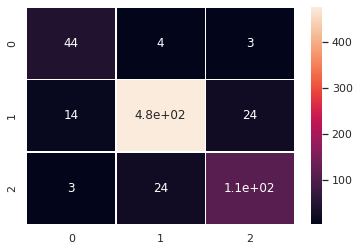

In [203]:
c_mat=tf.math.confusion_matrix(np.argmax(preds_t,-1),y_test)
ax = sns.heatmap(c_mat,annot=True,linewidths=.5)

# Get attention colorings

https://towardsdatascience.com/deconstructing-bert-part-2-visualizing-the-inner-workings-of-attention-60a16d86b5c1


In [29]:
classifier_model.layers

In [32]:
from official.nlp import bert 
import official.nlp.bert.tokenization

In [33]:
tokenizer = bert.tokenization.FullTokenizer(vocab_file='/content/drive/MyDrive/Text-ML/vocab.txt')
preprocesser_model = keras.Model(inputs=classifier_model.input,outputs=classifier_model.get_layer('preprocessing').output)
encoder_model = keras.Model(inputs=classifier_model.input,outputs=classifier_model.get_layer('BERT_encoder').output)

In [34]:
print("Vocab size:", len(tokenizer.vocab))

Vocab size: 30522


## Attnetion token mapping

In [98]:
def get_attn(context,prep,encoder): # assume stirng array input
  t_context=tf.convert_to_tensor(context)

  p_out=prep(t_context)
  stop_index=0
  while(p_out["input_mask"][0][stop_index] == 1):
    stop_index+=1

  output = encoder(t_context)
  valid_entries=output["sequence_output"][:,1:stop_index-1,:]
  a=tf.math.reduce_mean(valid_entries,-1)
  mean=tf.math.reduce_mean(a,-1,keepdims=True)
  std=tf.math.reduce_std(a,-1,keepdims=True)
  a1=(a-mean)/std

  return a1

In [306]:
def get_attn_for_words(context,tokenizer,prep,encoder):
  attn = get_attn(context,prep,encoder).numpy()
  tokens = tokenizer.tokenize(context[0]) 
  print(tokens)

  indicies=np.ones((len(tokens)),dtype=int)
  for i,tok in enumerate(tokens):
    if '##' in tok:
      indicies[i]=0

  full_words=tokens.copy()
  ix=-1
  for i,tok in enumerate(tokens):
    if not indicies[i]:
      attn[0][ix]+=attn[0][i]
      full_words[ix]+=tok[2:]
    else:
      ix=i
  print('got here',len(full_words),len(indicies))

  t_f=tf.convert_to_tensor(full_words) #stores as byte string...
  print(t_f)
  print(indicies)
  masked_f=tf.boolean_mask(t_f,indicies)

  t_a=tf.convert_to_tensor(attn)[0]
  masked_a=tf.boolean_mask(t_a,indicies)
  print('got here',len(full_words),t_f.shape,len(indicies))

  return masked_f.numpy(),masked_a.numpy()

#words, at=get_attn_for_words(processed,tokenizer,preprocesser_model,encoder_model)

## converters and annotation

In [310]:
def process_for_input(raw_context):
  c1,_ =remove_matches(text=raw_context,regex=re_apa)
  c2,_ =remove_matches(text=c1,regex='[^\w_\-0-9 ]+')
  return [c2]

#process_for_input(example)

In [132]:
def conv_bytes_strs(words):
  return [w.decode('UTF-8') for w in list(words)]

In [109]:
def conv_to_color(attn): #blue pos red neg
  rgbs = np.zeros((len(attn),3),dtype=int)
  for i,score in enumerate(attn):
    if score > 0:
      rgbs[i][0]=255*score//2
    else:
      rgbs[i][2]=-255*score//2
  
  return rgbs

In [179]:
def coloring(text,fore=None,back=None):
    txt=text
    if fore != None:
      txt = "\033[38;2;{};{};{}m".format(fore[0], fore[1], fore[2])+txt
    if back != None:
      txt = "\033[48;2;{};{};{}m".format(back[0], back[1], back[2])+txt
    return txt

#print(coloring('Hello',back=[500,0,0]) + coloring('Hello', back=(0,0,255)))

## full pipeline

In [292]:
def color_by_attn(text,toker,preper,encoder):
  all_words_original=text.split()
  all_words=text.lower().split()
  processed= process_for_input(text)
  print('saw:',text)
  print('saw:',processed)
  words, at=get_attn_for_words(processed,tokenizer,preprocesser_model,encoder_model)
  print('attn_recived')
  ws=conv_bytes_strs(words)
  conv=conv_to_color(at)
  mapping=dict(zip(ws,conv))
  orig_mapping=dict(zip(all_words,all_words_original))

  for i,w in enumerate(all_words):
    if w not in mapping:
      mapping[w]=[0,0,0]
    else:
      mapping[w]=list(mapping[w])

  colored=[coloring(orig_mapping[word],back=mapping[word]) for word in all_words]
  printed=' '.join(colored)
  return printed

example=list(df3['text'])[0]
print(color_by_attn(example,tokenizer,preprocesser_model,encoder_model))

saw: Many approaches for POS tagging have been developed in the past, including rule-based tagging (Brill, 1995), HMM taggers (Brants, 2000; Cutting and others, 1992), maximum-entropy models (Rathnaparki, 1996), cyclic dependency networks (Toutanova et al. , 2003), memory-based learning (Daelemans et al. , 1996), etc. All of these approaches require either a large amount of annotated training data (for supervised tagging) or a lexicon listing all possible tags for each word (for unsupervised tagging).
saw: ['Many approaches for POS tagging have been developed in the past including rulebased tagging Brill 1995 HMM taggers Brants 2000  maximumentropy models Rathnaparki 1996 cyclic dependency networks  memorybased learning  etc All of these approaches require either a large amount of annotated training data for supervised tagging or a lexicon listing all possible tags for each word for']
['many', 'approaches', 'for', 'po', '##s', 'tag', '##ging', 'have', 'been', 'developed', 'in', 'the', 

# PDF text extratction


In [214]:
pip install pdfminer.six

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.6 MB 9.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.0 MB 35.3 MB/s 


In [215]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

In [257]:
def convert_pdf_to_string(file_path):
	output_string = StringIO()
	with open(file_path, 'rb') as in_file:
	    parser = PDFParser(in_file)
	    doc = PDFDocument(parser)
	    rsrcmgr = PDFResourceManager()
	    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
	    interpreter = PDFPageInterpreter(rsrcmgr, device)
	    for page in PDFPage.create_pages(doc):
	        interpreter.process_page(page)

	return(output_string.getvalue())
 
def sent_extract(sample):
	delims=re.findall('\. [A-Z]',sample)
	sents=re.split('\. [A-Z]',sample)

	sents[0]=sents[0]+'.'
	for i,s in enumerate(sents[1:]):
		sents[i+1]=delims[i][2]+s+'.'
	return sents

def pdf_text_extract(path):
  text=convert_pdf_to_string(path)
  text1 = text.replace('\x0c','')
  text2 = text1.split('.\n\n')
  refine=[t.replace('\n',' ') for t in text2]
  r=[]
  for t in refine:
    r+=sent_extract(t)
  return r

path='/content/drive/MyDrive/Text-ML/phocus.pdf'
text=pdf_text_extract(path)


In [265]:
title_end=0
ref_start=len(text)-1
while '¬©' not in text[title_end]:
  title_end+=1
while 'REFERENCES' not in text[ref_start]:
  ref_start-=1
content=text[title_end+3:ref_start]


# Coloring of a PDF

In [311]:
for t in content[34:35]:
  print(color_by_attn(t,tokenizer,preprocesser_model,encoder_model))

saw: Gao et al. [14] utilize three target-dependent variations of the ùêµùê∏ùëÖùëáùëèùëéùë†ùëí model.
saw: ['Gao et al 14 utilize three target-dependent variations of the ùêµùê∏ùëÖùëáùëèùëéùë†ùëí mod']
['gao', 'et', 'al', '14', 'utilize', 'three', 'target', '-', 'dependent', 'variations', 'of', 'the', '[UNK]', 'mod']
got here 14 14
tf.Tensor(
[b'gao' b'et' b'al' b'14' b'utilize' b'three' b'target' b'-' b'dependent'
 b'variations' b'of' b'the' b'[UNK]' b'mod'], shape=(14,), dtype=string)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


ValueError: ignored